In [5]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

dataset=pd.read_csv('H:\RUET\K_Means\Mall_Customers.csv')
print(dataset)

labelY=dataset.columns[4]
labelX=dataset.columns[3]

#print(labelY)
#print(labelX)

     customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]


In [2]:
X = dataset.iloc[:, [3, 4]].values
#print(X)
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
#print(m)
#print(n)
n_iter=100
K=5 # number of clusters
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

Output={}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

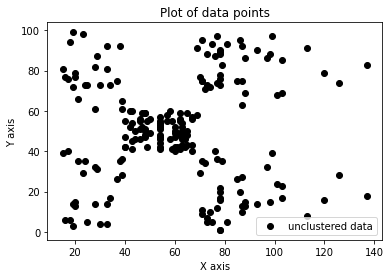

In [3]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.title('Plot of data points')
plt.show()

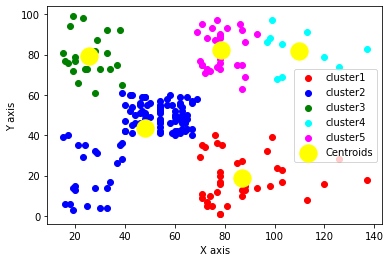

In [4]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()